## Integrate [AraVec](https://github.com/bakrianoo/aravec) with [Spacy.io](https://spacy.io/)

This notebook demonstrates how to integrate an [AraVec](https://github.com/bakrianoo/aravec) model with [spaCy.io](https://spacy.io/)

## Outlines

- Install/Load the required modules
- Load AraVec
- Export the Word2Vec format + gzip it.
- Initialize the spaCy model using AraVec vectors
- Run  AraVec Spacy Model
- Test the Model
- Using model as Word Embedding provider for user Question
- Model Evaluation by Distance and Similarity based metrics
- Error Analysis

## Install/Load the required modules

In [ ]:
!pip install gensim spacy nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [7]:
from scipy.stats import spearmanr
import gensim
import re
import spacy
from scipy.spatial import distance
from scipy.stats import pearsonr


In [8]:

# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']
    
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    
    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    #trim    
    text = text.strip()

    return text

## Load AraVec
Download a model from the [AraVec Repository](https://github.com/bakrianoo/aravec), then follow the below steps to load it.

In [5]:
# load the AraVec model
model = gensim.models.Word2Vec.load("/content/drive/MyDrive/GP/full_grams_cbow_300_twitter.mdl")
print("We've",len(model.wv.index2word),"vocabularies")

We've 1476715 vocabularies


## Export the Word2Vec format + gzip it.

In [ ]:
# make a directory called "spacyModel"
#%mkdir spacyModel

In [6]:
# export the word2vec fomart to the directory
model.wv.save_word2vec_format("/content/drive/MyDrive/GP/spacyModel/aravec.txt")

In [7]:
# using `gzip` to compress the .txt file
!gzip /content/drive/MyDrive/GP/spacyModel/aravec.txt

## Initialize the spaCy model using AraVec vectors

- This will create a folder called `/spacy.aravec.model` within your current working directory.
- This step could take several minutes to be completed.

In [3]:
pip install "spacy~=2.3.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 5.3 MB/s 
     |████████████████████████████████| 208 kB 75.8 MB/s 
     |████████████████████████████████| 1.0 MB 67.2 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.2
    Uninstalling spacy-3.4.2:
      Successfully uninstalled spacy-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [4]:
!python -m spacy  init-model ar spacy.aravec.model --vectors-loc /content/drive/MyDrive/GP/spacyModel/aravec.txt.gz

✔ Successfully created model
⠇ Reading vectors from /content/drive/MyDrive/GP/spacyModel/aravec.txt.gztcmalloc: large alloc 1772060672 bytes == 0x3da0000 @  0x7f5819295001 0x7f5816be41af 0x7f5816c3ac23 0x7f5816c3ba87 0x7f5816cdd823 0x58f62c 0x510bf2 0x5b4ee6 0x58ff2e 0x50c4fc 0x5b4ee6 0x58ff2e 0x50c4fc 0x5b4ee6 0x4bad99 0x50e18c 0x5b575e 0x58ff2e 0x50ca37 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x6005a3 0x631909 0x58f4ed 0x50ff13 0x5b4ee6 0x58ff2e 0x50c4fc 0x5b4ee6
1476715it [02:56, 8369.37it/s] 
✔ Loaded vectors from
/content/drive/MyDrive/GP/spacyModel/aravec.txt.gz
✔ Sucessfully compiled vocab
1476903 entries, 1476715 vectors


## Run Your AraVec Spacy Model


In [5]:
!pip install nltk

!pip install spacy==2.3.5

!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

!pip install pyresparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 4.1 MB/s 
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.8
    Uninstalling spacy-2.3.8:
      Successfully uninstalled spacy-2.3.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 5.3 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=20bca4b3f7ef5711096c188b8fb3034ee2028293c56dd144e6454029425f3

In [9]:
# load AraVec Spacy model
nlp = spacy.load("./spacy.aravec.model/")

In [10]:
# Define the preprocessing Class
class Preprocessor:
    def __init__(self, tokenizer, **cfg):
        self.tokenizer = tokenizer

    def __call__(self, text):
        preprocessed = clean_str(text)
        return self.tokenizer(preprocessed)

In [11]:
# Apply the `Preprocessor` Class
nlp.tokenizer = Preprocessor(nlp.tokenizer)

## Test the Model

In [12]:
# Test your model
nlp("سياسات").vector

array([ 3.49176705e-01, -2.19255924e-01,  1.60989439e+00,  1.92484510e+00,
        4.39680129e-01, -2.45391202e+00,  1.20038486e+00, -2.47432327e+00,
       -8.00085664e-01,  2.53640485e+00, -9.78808999e-01,  2.07138205e+00,
       -5.92019856e-01, -7.51316130e-01, -1.08123958e+00, -1.53880513e+00,
       -6.17376208e-01,  1.91213000e+00,  1.70518744e+00,  6.37496650e-01,
       -7.80412674e-01,  8.66371036e-01, -5.03959537e-01,  1.42896271e+00,
        1.19330311e+00,  3.68727773e-01, -2.58546805e+00, -1.29053664e+00,
       -2.18352407e-01, -5.58572173e-01,  1.32803656e-02, -1.60445797e+00,
       -4.90821213e-01,  7.11713791e-01, -2.19430876e+00,  3.67237814e-02,
       -1.41925108e+00, -7.25821257e-02, -1.53280437e+00,  2.90860265e-01,
       -1.47955030e-01,  1.17669499e+00, -9.26764667e-01, -5.93682408e-01,
        4.93071109e-01, -5.60185492e-01, -9.48402047e-01, -2.23287511e+00,
        6.90190434e-01, -3.04384202e-01,  1.75442171e+00,  4.30127472e-01,
       -3.45586568e-01,  

#### Show Example of Word Embedding

In [7]:

egypt = nlp("مصر")
tunisia = nlp("تونس")
apple = nlp("تفاح")

print("egypt Vs. tunisia = ", egypt.similarity(tunisia))
print("egypt Vs. apple = ", egypt.similarity(apple))

egypt Vs. tunisia =  0.743507219635661
egypt Vs. apple =  0.07485823601513765


# Evaluation Part
 Using created questions from Bank policies

In [13]:
import pandas as pd
data_created=pd.read_excel("/content/drive/MyDrive/GP/polices.xlsx")
data_created

,questions,answers,questions_2
0,ما هو هدف السياسة النقدية ؟,يعهد قانون البنك المركزى والجهاز المصرفى والنق...,ايه هو هدف السياسة النقدية؟
1,ماذا يفعل البنك المركزى المصرى حتى يتحول إلى ن...,يطمح البنك المركزى المصرى فى تطبيق إستهداف الت...,كيف يمكن يتحول البنك المركزى الى نظام مكتمل؟
2,كيف تقرر لجنة السياسة النقدية أسعار العائد ؟,تعرض على لجنة السياسة النقدية التقارير والدراس...,ازاى تقرر لجنة السياسات النقدية سعر العائد؟
3,ما هى لجنة السياسة النقدية ؟,تتكون لجنة السياسة النقدية التى تم تشكيلها بقر...,ما هى لجنة السياسات النقدية؟
4,ما هو دور البنك المركزي السعودي في تنظيم علاقة...,يعتبر البنك المركزي السعودي الجهة الإشرافية وا...,ايه هو دور البنك المركزى السعودى في تنظيم العل...
5,ما هي آلية استقبال شكاوى العملاء في البنك المر...,في حال عدم قناعة الشاكي بنتائج معالجة شكواه لد...,ما هي طريقة استقبال الشكاوى من العملاء في البن...
6,ما هي قنوات استقبال الشكاوى في البنك المركزي ا...,إدارة حماية العملاء بالمركز الرئيسي في البنك ...,ايه هي طرق استقبال الشكاوى في البنك المركزى ال...
7,هل يحق للبنك أخذ رسوم إصدار بطاقات الصرف الآلي؟,اشتملت التعرفة البنكية الصادرة من البنك المركز...,هل يعتبر حق البنك في اخذ رسوم اصدار بطاقات الصرف؟
8,هل يحق للبنك المطالبة بسداد مستحقات البطاقات ا...,يختلف ذلك حسب نوع البطاقة، فهناك بطاقات الخصم ...,هل من حق البنك ان يطالب بسداد مستحقات البطاقة ...
9,هل يحق للبنك خصم مستحقات البطاقات الائتمانية م...,يخضع هذا الاجراء إلى الاتفاقية المبرمة بين الب...,هل من حق البنك ان يخصم مستحقات البطاقة الائتما...


# Similarity based metrics.

### Cosine Similarity

In [11]:
accuracies=[]
for i in range(len(data_created)):
    cosine_scores = nlp(str(data_created.iloc[i][0])).similarity(nlp(str(data_created.iloc[i][2])))
    
    accuracies.append(cosine_scores)
    print(data_created.iloc[i][0]," Score:",cosine_scores)

cosine_score=sum(accuracies)/len(data_created)
print("Correlation Average using Cosine Similarity=",cosine_score)

ما هو هدف السياسة النقدية ؟   Score: 0.9374566792548238
ماذا يفعل البنك المركزى المصرى حتى يتحول إلى نظام مكتمل الملامح لإستهداف التضخم (Inflation Targeting Regime) ؟  Score: 0.8865554408530075
كيف تقرر لجنة السياسة النقدية أسعار العائد ؟  Score: 0.9046783525081978
ما هى لجنة السياسة النقدية ؟  Score: 0.9731075138317797
ما هو دور البنك المركزي السعودي في تنظيم علاقة البنوك وشركات التأمين وشركات التمويل مع عملاءه؟  Score: 0.9751725626010426
ما هي آلية استقبال شكاوى العملاء في البنك المركزي السعودي؟
  Score: 0.9564789185465701
ما هي قنوات استقبال الشكاوى في البنك المركزي السعودي؟  Score: 0.9511105846948558
هل يحق للبنك أخذ رسوم إصدار بطاقات الصرف الآلي؟  Score: 0.9366847739603515
هل يحق للبنك المطالبة بسداد مستحقات البطاقات الائتمانية بالكامل؟  Score: 0.8749104293190757
هل يحق للبنك خصم مستحقات البطاقات الائتمانية من حساب العميل مباشرة؟  Score: 0.932807552589022
هل يحق للبنك رفض إصدار ومنح العميل بطاقة ائتمانية؟  Score: 0.8971175715280164
هل يحق للبنك عند منح العميل بطاقة ائتمانية إدراج 

###  Pearson’s correlation and Spearman’s correlation

In [12]:
spearman_corr=[]
pearson_corr=[]

for i in range(len(data_created)):
    embedding_11=nlp(str(data_created.iloc[i][0])).vector
    embedding_22=nlp(str(data_created.iloc[i][2])).vector
    sp_corr, _ = spearmanr(embedding_11, embedding_22)
    ps_corr, _ = pearsonr(embedding_11, embedding_22)  
    spearman_corr.append(sp_corr)
    pearson_corr.append(ps_corr)
    print("spearman's score=",sp_corr, " pearson's score=",ps_corr," \n",data_created.iloc[i][0], "  ",data_created.iloc[i][2],"\n")

pears_score=sum(pearson_corr)/len(data_created)
spear_score=sum(spearman_corr)/len(data_created)
print("Correlation Average using Pearson’s =",pears_score)
print("Correlation Average using Spearman’s =",spear_score)

spearman's score= 0.9327908087867642  pearson's score= 0.93736168081556  
 ما هو هدف السياسة النقدية ؟     ايه هو هدف السياسة النقدية؟ 

spearman's score= 0.8869476327514749  pearson's score= 0.8854143458744131  
 ماذا يفعل البنك المركزى المصرى حتى يتحول إلى نظام مكتمل الملامح لإستهداف التضخم (Inflation Targeting Regime) ؟    كيف يمكن يتحول البنك المركزى الى نظام مكتمل؟ 

spearman's score= 0.885502283358704  pearson's score= 0.9044393035143067  
 كيف تقرر لجنة السياسة النقدية أسعار العائد ؟    ازاى تقرر لجنة السياسات النقدية سعر العائد؟ 

spearman's score= 0.9700747786086512  pearson's score= 0.9728908116476543  
 ما هى لجنة السياسة النقدية ؟     ما هى لجنة السياسات النقدية؟ 

spearman's score= 0.9733232591473239  pearson's score= 0.9749356587637203  
 ما هو دور البنك المركزي السعودي في تنظيم علاقة البنوك وشركات التأمين وشركات التمويل مع عملاءه؟    ايه هو دور البنك المركزى السعودى في تنظيم العلاقات بين البنوك  و شركات التمويل مع العملاء و شركات التامين ؟  

spearman's score= 0.94995899

## Distance based metrics

###  Manhatan Distance

In [13]:
manh_distances=[]
for i in range(len(data_created)):
    embedding_11=nlp(str(data_created.iloc[i][0])).vector
    embedding_22=nlp(str(data_created.iloc[i][2])).vector
    dst = distance.cityblock(embedding_11,embedding_22)
    print("Manhatan distance =",dst, " \n",data_created.iloc[i][0], "  ",data_created.iloc[i][2],"\n")
    manh_distances.append(dst)
#     print(data_created.iloc[i][0]," Manhatan Distance:",cosine_scores)

manh_distances

manh_score=sum(manh_distances)/len(data_created)

print("Average distance using Manhatan distance=",manh_score)

Manhatan distance = 65.32497  
 ما هو هدف السياسة النقدية ؟     ايه هو هدف السياسة النقدية؟ 

Manhatan distance = 93.69423  
 ماذا يفعل البنك المركزى المصرى حتى يتحول إلى نظام مكتمل الملامح لإستهداف التضخم (Inflation Targeting Regime) ؟    كيف يمكن يتحول البنك المركزى الى نظام مكتمل؟ 

Manhatan distance = 63.8925  
 كيف تقرر لجنة السياسة النقدية أسعار العائد ؟    ازاى تقرر لجنة السياسات النقدية سعر العائد؟ 

Manhatan distance = 58.603657  
 ما هى لجنة السياسة النقدية ؟     ما هى لجنة السياسات النقدية؟ 

Manhatan distance = 37.70464  
 ما هو دور البنك المركزي السعودي في تنظيم علاقة البنوك وشركات التأمين وشركات التمويل مع عملاءه؟    ايه هو دور البنك المركزى السعودى في تنظيم العلاقات بين البنوك  و شركات التمويل مع العملاء و شركات التامين ؟  

Manhatan distance = 50.73676  
 ما هي آلية استقبال شكاوى العملاء في البنك المركزي السعودي؟
    ما هي طريقة استقبال الشكاوى من العملاء في البنك المركزى السعودى؟ 

Manhatan distance = 50.85011  
 ما هي قنوات استقبال الشكاوى في البنك المركزي السعودي؟   

###  Euclidean distance

In [14]:
Eucl_distances=[]
for i in range(len(data_created)):
    embedding_11=nlp(str(data_created.iloc[i][0])).vector
    embedding_22=nlp(str(data_created.iloc[i][2])).vector
    dst = distance.euclidean(embedding_11,embedding_22)
    print("Euclidean distance =",dst, " \n",data_created.iloc[i][0], "  ",data_created.iloc[i][2],"\n")
    Eucl_distances.append(dst)
#     print(data_created.iloc[i][0]," Manhatan Distance:",cosine_scores)


eucl_score=sum(Eucl_distances)/len(data_created)
print("Average distance using Euclidean distance=",eucl_score)

Euclidean distance = 4.687132358551025  
 ما هو هدف السياسة النقدية ؟     ايه هو هدف السياسة النقدية؟ 

Euclidean distance = 6.7708611488342285  
 ماذا يفعل البنك المركزى المصرى حتى يتحول إلى نظام مكتمل الملامح لإستهداف التضخم (Inflation Targeting Regime) ؟    كيف يمكن يتحول البنك المركزى الى نظام مكتمل؟ 

Euclidean distance = 4.665406227111816  
 كيف تقرر لجنة السياسة النقدية أسعار العائد ؟    ازاى تقرر لجنة السياسات النقدية سعر العائد؟ 

Euclidean distance = 4.252400875091553  
 ما هى لجنة السياسة النقدية ؟     ما هى لجنة السياسات النقدية؟ 

Euclidean distance = 2.734492063522339  
 ما هو دور البنك المركزي السعودي في تنظيم علاقة البنوك وشركات التأمين وشركات التمويل مع عملاءه؟    ايه هو دور البنك المركزى السعودى في تنظيم العلاقات بين البنوك  و شركات التمويل مع العملاء و شركات التامين ؟  

Euclidean distance = 3.7046937942504883  
 ما هي آلية استقبال شكاوى العملاء في البنك المركزي السعودي؟
    ما هي طريقة استقبال الشكاوى من العملاء في البنك المركزى السعودى؟ 

Euclidean distance = 3.697

## Visualization Result

### Correlation Metrics

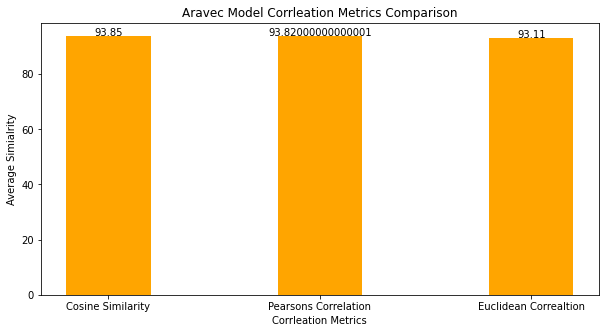

In [23]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

x_axis=["Cosine Similarity","Pearsons Correlation","Euclidean Correaltion"]
values=[round(cosine_score,4)*100, round(pears_score,4)*100 ,round(spear_score,4) *100]
  
fig = plt.figure(figsize = (10, 5))

for i in range(len(values)):
    plt.text(i, values[i], values[i], ha = 'center')
    
# creating the bar plot
plt.bar(x_axis, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Corrleation Metrics")
plt.ylabel("Average Simialrity")
plt.title("Aravec Model Corrleation Metrics Comparison")
plt.show()

### Distance Metrics

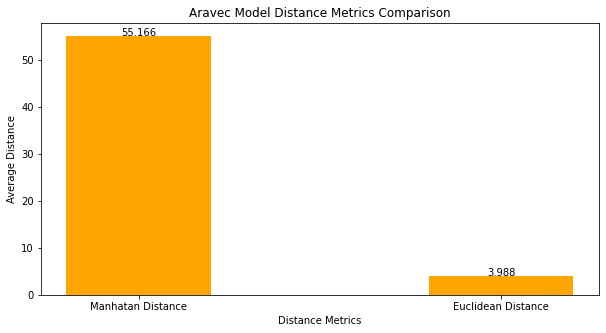

In [20]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

x_axis=["Manhatan Distance","Euclidean Distance"]
values=[round(manh_score,3),round(eucl_score,3)]
  
fig = plt.figure(figsize = (10, 5))
for i in range(len(values)):
  plt.text(i, values[i], values[i], ha = 'center')
# creating the bar plot
plt.bar(x_axis, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Distance Metrics")
plt.ylabel("Average Distance")
plt.title("Aravec Model Distance Metrics Comparison")
plt.show()

# Error Analysis:

##  Question in Database

In [14]:
data_created.iloc[30][0]

'هل يحق للبنك رفض منح العميل قرض شخصي؟  '

### A change in the wording of the question but the same meaning

In [15]:
tst="هل يمكن للبنك ان يرفض منح العملاء قروض شخصية؟"

### Test

In [20]:
accuracies=[]
for i in range(len(data_created)):
    cosine_scores = nlp(str(data_created.iloc[i][0])).similarity(nlp(tst))
    
    accuracies.append(cosine_scores)
    print(" Score:",cosine_scores,data_created.iloc[i][0])


 Score: 0.7507704270961684 ما هو هدف السياسة النقدية ؟ 
 Score: 0.7966724643319357 ماذا يفعل البنك المركزى المصرى حتى يتحول إلى نظام مكتمل الملامح لإستهداف التضخم (Inflation Targeting Regime) ؟
 Score: 0.7446913433447089 كيف تقرر لجنة السياسة النقدية أسعار العائد ؟
 Score: 0.7527298834270331 ما هى لجنة السياسة النقدية ؟
 Score: 0.8461231669393066 ما هو دور البنك المركزي السعودي في تنظيم علاقة البنوك وشركات التأمين وشركات التمويل مع عملاءه؟
 Score: 0.843596300144332 ما هي آلية استقبال شكاوى العملاء في البنك المركزي السعودي؟

 Score: 0.8265912816758636 ما هي قنوات استقبال الشكاوى في البنك المركزي السعودي؟
 Score: 0.8052396383545379 هل يحق للبنك أخذ رسوم إصدار بطاقات الصرف الآلي؟
 Score: 0.8030011928897792 هل يحق للبنك المطالبة بسداد مستحقات البطاقات الائتمانية بالكامل؟
 Score: 0.8641325351687292 هل يحق للبنك خصم مستحقات البطاقات الائتمانية من حساب العميل مباشرة؟
 Score: 0.856164151433768 هل يحق للبنك رفض إصدار ومنح العميل بطاقة ائتمانية؟
 Score: 0.8431086880019744 هل يحق للبنك عند منح ال